## Configuro notebook

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

## Importo librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
tf.random.set_seed(42)
np.random.seed(42)

## Preparo dataset

In [4]:
df = pd.read_csv(DATOS_DIR+'beijing_air_quality.csv')
display(df.head())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,16151,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.0,SW,0.7,Aotizhongxin,2015-01-02 22:00:00
1,16152,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.0,NNW,0.7,Aotizhongxin,2015-01-02 23:00:00
2,16153,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.0,SSE,0.4,Aotizhongxin,2015-01-03 00:00:00
3,16154,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.0,ESE,0.4,Aotizhongxin,2015-01-03 01:00:00
4,16155,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,0.0,NE,1.1,Aotizhongxin,2015-01-03 02:00:00


In [5]:
df=df.drop(columns=['RAIN', 'wd', 'No', 'station'])
print(df.shape)
display(df.head())

(18914, 11)


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,datetime
0,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.7,2015-01-02 22:00:00
1,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.7,2015-01-02 23:00:00
2,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.4,2015-01-03 00:00:00
3,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.4,2015-01-03 01:00:00
4,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,1.1,2015-01-03 02:00:00


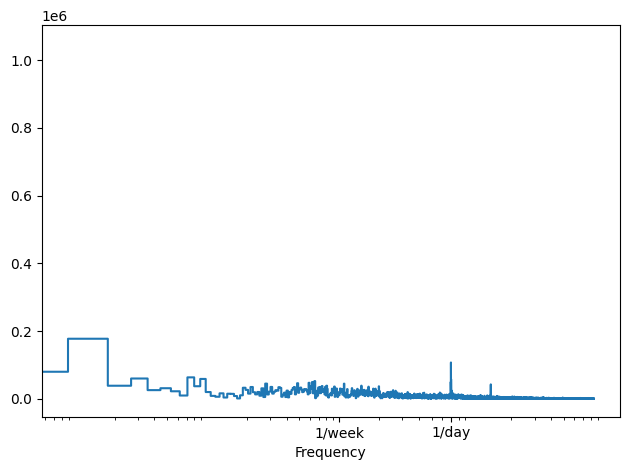

In [7]:

import datetime

timestamp_s = pd.to_datetime(df.datetime).map(datetime.datetime.timestamp)

fft = tf.signal.rfft(df['NO2'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['NO2'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()


In [8]:
df = df.drop(['datetime'], axis=1)

df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.7
1,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.7
2,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.4
3,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.4
4,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,1.1


In [9]:
print(df.corr())

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.885525  0.486366  0.707551  0.777983 -0.187513 -0.174947   
PM10   0.885525  1.000000  0.461968  0.647914  0.672198 -0.149632 -0.138423   
SO2    0.486366  0.461968  1.000000  0.437755  0.512802 -0.198206 -0.384969   
NO2    0.707551  0.647914  0.437755  1.000000  0.716804 -0.520762 -0.304801   
CO     0.777983  0.672198  0.512802  0.716804  1.000000 -0.348935 -0.368847   
O3    -0.187513 -0.149632 -0.198206 -0.520762 -0.348935  1.000000  0.621334   
TEMP  -0.174947 -0.138423 -0.384969 -0.304801 -0.368847  0.621334  1.000000   
PRES   0.014056 -0.027557  0.223439  0.149588  0.200579 -0.461327 -0.839829   
DEWP   0.082099  0.036170 -0.322258  0.010929 -0.078324  0.318139  0.821227   
WSPM  -0.307466 -0.205875 -0.160812 -0.516863 -0.343894  0.370154  0.087240   

           PRES      DEWP      WSPM  
PM2.5  0.014056  0.082099 -0.307466  
PM10  -0.027557  0.036170 -0.205875  
SO2    0.223439 

In [10]:
df = df.drop(['TEMP', 'PRES', 'DEWP'], axis=1)

df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,WSPM
0,118.0,147.0,58.0,100.0,2000.0,2.0,0.7
1,137.0,179.0,63.0,101.0,2100.0,2.0,0.7
2,141.0,215.0,59.0,100.0,2300.0,2.0,0.4
3,136.0,158.0,65.0,106.0,3000.0,2.0,0.4
4,132.0,163.0,56.0,107.0,3000.0,2.0,1.1


# Función para generar las particiones preservando las características de la serie de tiempo

In [11]:
def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (15131, 7)
Tamaño set de validación: (1891, 7)
Tamaño set de prueba: (1892, 7)


# Dibujo la temperatura

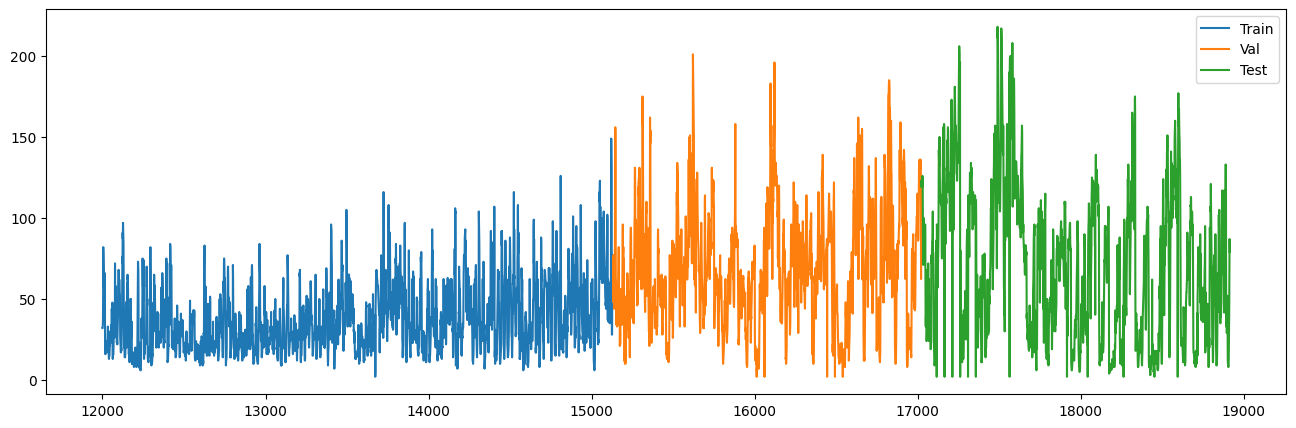

In [12]:
covar = 3
col = df.columns[covar]

fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr.iloc[12000:-1,covar], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
plt.legend();

In [14]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red SimpleRNN.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+input_length,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños

In [15]:
INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (15106, 24, 7), y_tr: (15106, 1, 1)
Set de validación - x_vl: (1866, 24, 7), y_vl: (1866, 1, 1)
Set de prueba - x_ts: (1867, 24, 7), y_ts: (1867, 1, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# atributo a predecir
col_ref = df.columns.get_loc("NO2")

NFEATS = x_tr.shape[2]
print("NFEATS = ", NFEATS)
print("col_ref=", col_ref)

#Generar una lista de 'scalers', 1 para cada atributo
#scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]
scalers = [MinMaxScaler(feature_range=(0,1)) for i in range(NFEATS)]
#scalers = [RobustScaler() for i in range(NFEATS)]
#scalers = [StandardScaler() for i in range(NFEATS)]

NFEATS =  7
col_ref= 3


In [17]:
# Arreglos que contendrán los datasets escalados
x_tr_s = np.zeros(x_tr.shape)
x_vl_s = np.zeros(x_vl.shape)
x_ts_s = np.zeros(x_ts.shape)
y_tr_s = np.zeros(y_tr.shape)
y_vl_s = np.zeros(y_vl.shape)
y_ts_s = np.zeros(y_ts.shape)

for i in range(NFEATS):
  x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
  x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
  x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

# Escalamiento Ys
y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

# Gráfica tipo violín para ver la distribución de los valores

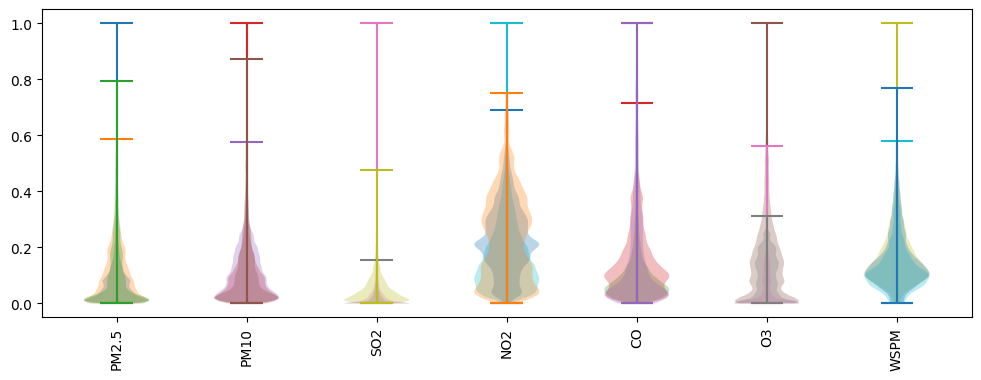

In [18]:
fig, ax = plt.subplots(figsize=(12,4))
for i in range(NFEATS):
  ax.violinplot(dataset = x_tr_s[:,:,i].flatten(), positions=[i])
  ax.violinplot(dataset = x_vl_s[:,:,i].flatten(), positions=[i])
  ax.violinplot(dataset = x_ts_s[:,:,i].flatten(), positions=[i])

ax.set_xticks(list(range(NFEATS)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale();

# Observemos la variable temperatura

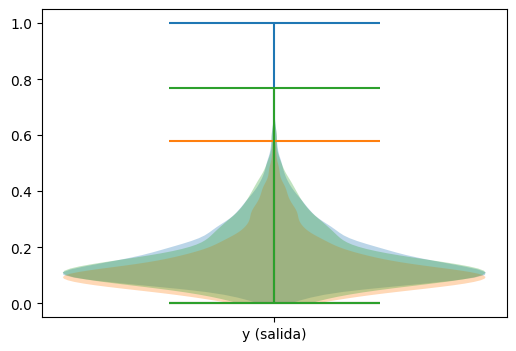

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

# Creación del modelo

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo

N_UNITS = 128  # Tamaño del estado oculto (h)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 13 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE)) #, return_sequences=True))
#modelo.add(LSTM(64))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-4)
modelo.compile(
    optimizer = optimizador,
    loss=root_mean_squared_error  #loss = 'mse'
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
60/60 - 2s - loss: 0.0925 - val_loss: 0.0791 - 2s/epoch - 35ms/step
Epoch 2/80
60/60 - 0s - loss: 0.0771 - val_loss: 0.0792 - 284ms/epoch - 5ms/step
Epoch 3/80
60/60 - 0s - loss: 0.0726 - val_loss: 0.0642 - 284ms/epoch - 5ms/step
Epoch 4/80
60/60 - 0s - loss: 0.0693 - val_loss: 0.0830 - 285ms/epoch - 5ms/step
Epoch 5/80
60/60 - 0s - loss: 0.0682 - val_loss: 0.0794 - 286ms/epoch - 5ms/step
Epoch 6/80
60/60 - 0s - loss: 0.0665 - val_loss: 0.0904 - 304ms/epoch - 5ms/step
Epoch 7/80
60/60 - 0s - loss: 0.0656 - val_loss: 0.0918 - 295ms/epoch - 5ms/step
Epoch 8/80
60/60 - 0s - loss: 0.0652 - val_loss: 0.0635 - 302ms/epoch - 5ms/step
Epoch 9/80
60/60 - 0s - loss: 0.0647 - val_loss: 0.0699 - 271ms/epoch - 5ms/step
Epoch 10/80
60/60 - 0s - loss: 0.0642 - val_loss: 0.0602 - 297ms/epoch - 5ms/step
Epoch 11/80
60/60 - 0s - loss: 0.0639 - val_loss: 0.0698 - 251ms/epoch - 4ms/step
Epoch 12/80
60/60 - 0s - loss: 0.0640 - val_loss: 0.0692 - 268ms/epoch - 4ms/step
Epoch 13/80
60/60 - 0s - lo

## Graficar curvas de entrenamiento y validación para verificar que no existe overfitting

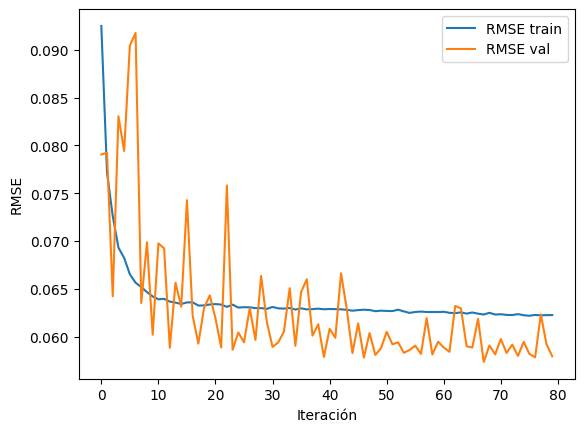

In [22]:
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

## Desempeño del modelo

In [23]:
# Cálculo de MSE para train, val y test
Rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
Rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
Rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  MSE train:\t {Rmse_tr:.3f}')
print(f'  MSE val:\t {Rmse_vl:.3f}')
print(f'  MSE test:\t {Rmse_ts:.3f}')

Comparativo desempeños:
  MSE train:	 0.062
  MSE val:	 0.056
  MSE test:	 0.063


In [24]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

## Calcular predicciones sobre el set de prueba


In [25]:
y_ts_pred = predecir(x_ts_s, modelo, scalers[col_ref])

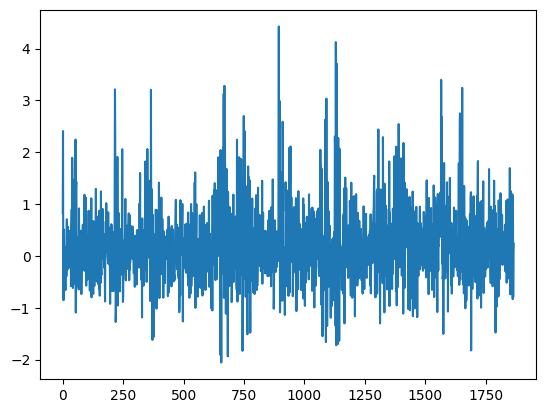

In [26]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

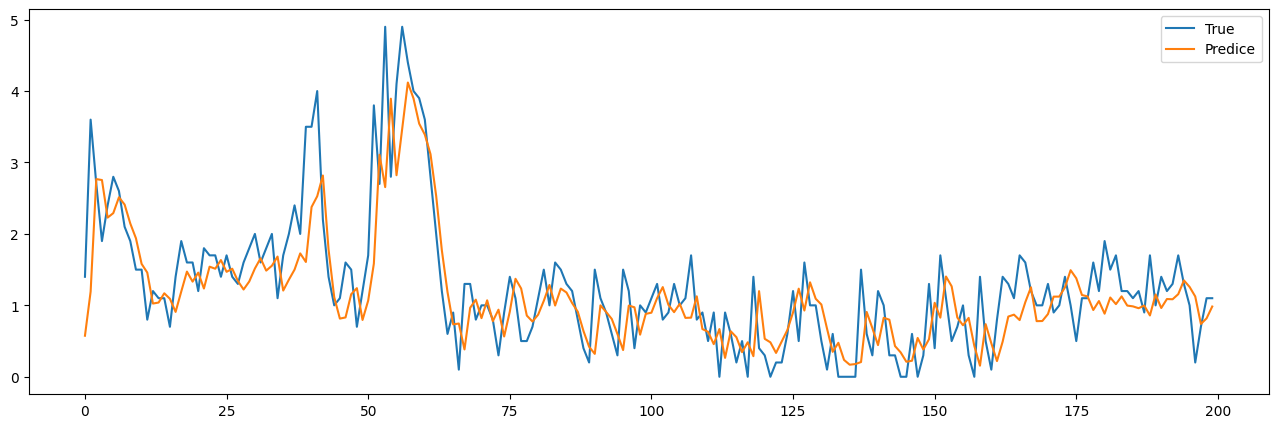

In [27]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(y_ts.flatten()[:200], label='True')
ax.plot(y_ts_pred[:200], label='Predice')
plt.legend();